<br><p style="font-family: Arial; font-size:2em;color:white; font-style:bold">
Matplotlib:<br> <br> <br> Explorando - Visualización de datos</p><br><br><br>
<br>
## Indiadores de Desarrollo Mundial
<img src="https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/03/23/14/topmap.jpg" align="middle">

Los Indicadores de Desarrollo Mundial del <b> Banco Mundial </b> contienen más de mil indicadores anuales de desarrollo económico de cientos de países de todo el mundo.

Aquí hay una lista de los indicadores disponibles junto con una lista de los países disponibles .

Fuente: https://www.kaggle.com/worldbank/world-development-indicators


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

plt.style.use("seaborn-dark")

In [5]:
data = pd.read_csv('wdi/Indicators.csv')
data.shape
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [9]:
filter = data['CountryName']=='Argentina'
data[filter].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3965,Argentina,ARG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,6.137800e+01
3966,Argentina,ARG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,5.699722e+01
3967,Argentina,ARG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,8.758858e+00
3968,Argentina,ARG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,4.823837e+01
3969,Argentina,ARG,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,1.030000e+08


### ¿Cuantos países  hay ?

In [4]:
countries = data['CountryName'].unique().tolist()
#print(countries)
print("Paises ➭ ",len(countries))

Paises ➭  247


### ¿Cuántos códigos de países hay?

In [10]:
countryCodes = data['CountryCode'].unique().tolist()
print("Códigos de países ➭ ",len(countryCodes))
#print()
print(countryCodes)

Códigos de países ➭  247
['ARB', 'CSS', 'CEB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'FCS', 'HPC', 'HIC', 'NOC', 'OEC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'OSS', 'PSS', 'SST', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'ALB', 'DZA', 'ASM', 'ADO', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'ZAR', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMY', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'KSV', 'KWT', 'KGZ', 'LAO', '

### ¿Cuántos indicadores hay?

In [11]:
indicators = data['IndicatorName'].unique().tolist()
print("Indicadores ➭ ",len(indicators))

Indicadores ➭  1344


### ¿Datos de cuántos años hay?

In [12]:
years = data['Year'].unique().tolist()
print("Años ➭ ",len(years))

Años ➭  56


### ¿Cuál es el rango temporal?

In [13]:
print("desde", min(years),"hasta",max(years))

desde 1960 hasta 2015


<br><br><br><p style="font-family: Arial; font-size:2.5em;color:purple; font-style:bold">
Matplotlib: Gráficos Básicos</p><br>

Vamos a explorar las emisiones per cápita de un país en particular

In [14]:
# nombre del indicador ➭  CO2 emissions (metric tons per capita)
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'ARG'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# Aplicamos ambas máscaras.
total_co2 = data[mask1 & mask2]
total_co2.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4326539,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2007,4.496834
4506967,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,4.744178
4686500,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2009,4.427960
4866646,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,4.342272
5051859,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.562049


## Veamos cómo cambiaron las emisiones a lo largo del tiempo

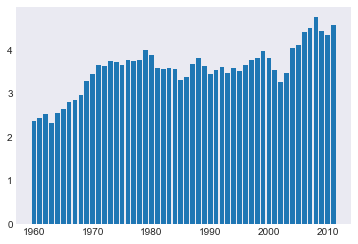

In [17]:
# obtenemos los años
years = total_co2['Year']
# obtenemos los calores de cada año
co2 = total_co2['Value']

# dibujamos
plt.bar(years,co2)
plt.show()

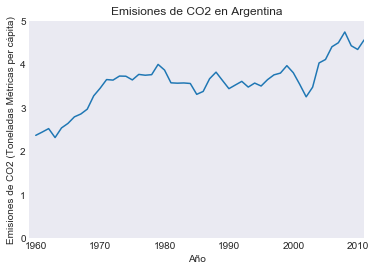

In [16]:
# Cambiamos a gráfico de líneas

plt.plot(total_co2['Year'], total_co2['Value'])

# Label the axes
plt.xlabel('Año')

# en Y puedo poner directamente el nombre del indicador
# plt.ylabel(stage['IndicatorName'].iloc[0])
plt.ylabel("Emisiones de CO2 (Toneladas Métricas per cápita)")

#label the figure
plt.title('Emisiones de CO2 en Argentina')

# ********************************
# ********* IMPORTANTE ***********
# ********************************
# notar como podemos retocar las escalas
plt.axis([1959, 2011,0,5])

plt.show()

### Usando histogramas para explorar la distribución de valores

In [18]:

hist_data = total_co2['Value']
type(hist_data)

pandas.core.series.Series

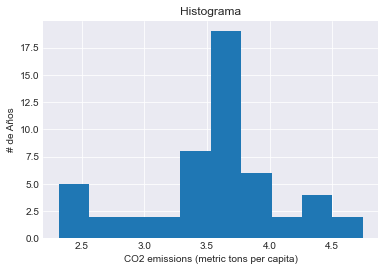

In [19]:
plt.hist(hist_data, 10)

plt.xlabel(total_co2['IndicatorName'].iloc[0])
plt.ylabel('# de Años')
plt.title('Histograma')

plt.grid(True)

plt.show()

Vemos como en Argentina la mayoría de los años se generó entre 3.5 y 4 toneladas métricas de CO2, qué pasó en tu país?

### Pero... ¿Cómo está Argentina con respecto a otros países?

In [20]:
# Seleccionamos todos los países en el año 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# aplicamos máscara
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [21]:
print(len(co2_2011))

232


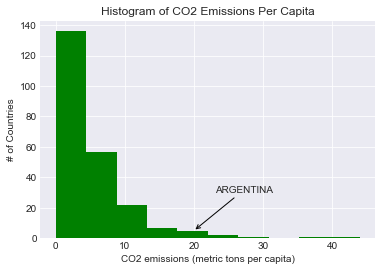

In [24]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("ARGENTINA",
            xy=(20, 5), xycoords='data',
            xytext=(23, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(total_co2['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#Puedo ajustar momentáneamente la escala para ver mejor los 4,5 aprox que tiene ARG 
# y así poder apuntar correctamente la flecha

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

In [25]:
# Seleccionamos el PIB de argentina (GDP)
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'ARG'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

#aplicamos la máscara
gdp_stage = data[mask1 & mask2]


In [27]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4007,Argentina,ARG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,3698.155770
27830,Argentina,ARG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,3836.735396


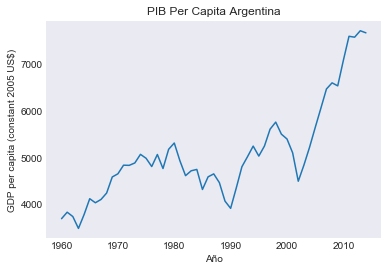

In [28]:
# Dibujaremos un gráfico de línea
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Año')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('PIB Per Capita Argentina')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000])

plt.show()

## Gráfico de dispersión para comprarar PIB vs CO2
Para este "Scatter plot" nos tenemos que asegurar que estamos viendo tanto en PIB como en CO2 las mismas ventanas temporales

In [29]:
print("PIB Min Year ➭",gdp_stage['Year'].min(), "max ➭", gdp_stage['Year'].max())
print("CO2 Min Year ➭",total_co2['Year'].min(), "max ➭", total_co2['Year'].max())

PIB Min Year ➭ 1960 max ➭ 2014
CO2 Min Year ➭ 1960 max ➭ 2011


#### Cuidado, tenemos 3 años adicionales, de PIB con respecto a CO2

In [31]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(total_co2))

52
52


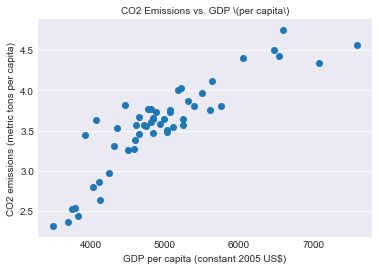

In [35]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(total_co2['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = total_co2['Value']

axis.scatter(X, Y)
plt.show()

In [37]:
np.corrcoef(gdp_stage_trunc['Value'],total_co2['Value'])

array([[1.        , 0.87906056],
       [0.87906056, 1.        ]])

<br><br><br> 
# Los graficos, hablan.

<img src="usa-scatter.jpg" style="width:400px">

<img src="usa-corr.jpg" style="width:400px">